In [1]:
import numpy as np
from scipy.optimize import golden
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Shape of matrix: (70, 3)
[[ 0.26075624  0.47945572  0.46698613]
 [ 2.21506206  0.02230943  0.2026091 ]
 [ 1.27829278  0.99921743 -1.21471805]
 [ 3.47729839  0.50494546 -0.1740595 ]
 [ 0.5830654   0.22228971 -1.70794213]
 [ 1.09773075  0.0161274   2.00165157]
 [ 0.37020661  0.23001544  1.8697235 ]
 [ 0.67157128  0.03109453  0.16951911]
 [ 0.08316173  0.34982227 -1.52558106]
 [ 0.39915734  0.69982532 -0.03007114]
 [ 3.00253743  0.71447219 -0.99578456]
 [ 1.42685744  0.14529894  0.74661762]
 [ 0.18128502  2.93686057 -0.65954114]
 [ 1.27126622  0.25971756 -1.82220345]
 [ 0.23300775  0.69589109 -1.17236669]
 [ 0.63843263  0.43832923  0.19995292]
 [ 2.01605162  0.81677165 -0.49781245]
 [ 0.54704675  1.13555653  2.52399891]
 [ 0.56637216  0.20068633  1.9910411 ]
 [ 0.17874729  0.50070168  1.07350733]
 [ 1.39061464  0.25646832  0.73537218]
 [ 1.77175255  0.19026465 -1.31119184]
 [ 2.63896029  0.78420422  0.11220237]
 [ 0.04841794  0.76477911  0.70427333]
 [ 0.81618971  0.97594388 -1.22486621]


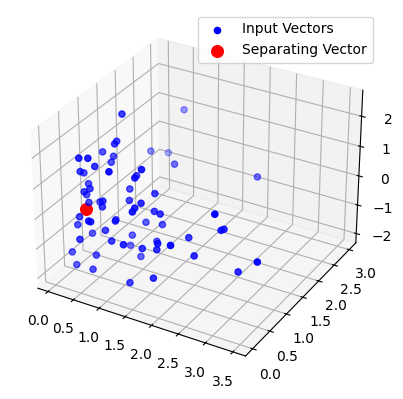

In [12]:
def find_separating_vector(matrix, initial_vector):
    """
    Find a separating vector using an iterative method to ensure
    min(j ∈ J)(α, xj) > 0.

    Parameters:
        matrix (numpy.ndarray): Input matrix where each row is a vector xj.
        initial_vector (numpy.ndarray): Initial vector to start the algorithm.

    Returns:
        numpy.ndarray: The final separating vector that satisfies the condition.
    """
    for row_index in range(matrix.shape[0]):
        scalar_product = np.dot(matrix[row_index], initial_vector)

        if scalar_product <= 0:
            print("\nRow vector and initial vector have scalar product <= 0")
            print("Row index:", row_index)
            print("Row vector:", matrix[row_index])
            print("Initial vector:", initial_vector)

            violating_vector  = matrix[row_index]

            # Minimize the expression with respect to k
            def objective(k):
                return np.linalg.norm((1 - k) * initial_vector + k * violating_vector)

            k = golden(objective, full_output=True)[0]

            # Update the separating vector
            updated_vector = (1 - k) * initial_vector + k * violating_vector
            print("Updated separating vector:", updated_vector)

            # Recursively call the function for the updated vector
            initial_vector = find_separating_vector(matrix, updated_vector)

    # If no violating vector exists, return the current separating vector
    return initial_vector


# Define the size of the dataset
n = 70

# Generate random vectors
random_vectors = np.column_stack([
    np.random.exponential(scale=1, size=(n, 1)),
    np.random.exponential(scale=1, size=(n, 1)),
    np.random.normal(size=(n, 1))
])
print("Shape of matrix:", random_vectors.shape)
print(random_vectors)

# Find the separating vector
separating_vector = find_separating_vector(random_vectors, random_vectors[0])

# Display the result
print("\nSeparating vector:", separating_vector)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the random vectors
ax.scatter(random_vectors[:, 0], random_vectors[:, 1], random_vectors[:, 2], c='blue', marker='o', label='Input Vectors')

# Highlight the separating vector
ax.scatter(separating_vector[0], separating_vector[1], separating_vector[2], c='red', marker='o', s=n, label='Separating Vector')

# Add legend and display the plot
ax.legend()
plt.show()